# Домашнее задание по теме: Обработка пропущенных значений

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
!where pip

C:\Anaconda3\envs\one\Scripts\pip.exe


In [2]:
# !conda install matplotlib numpy missingno scikit-learn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import sklearn
import sklearn.impute

sklearn.__version__

'0.24.2'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

In [8]:
import missingno as msno

msno.__version__

'0.4.2'

## Загрузка данных

[Источник (San Francisco Building Permits)](https://www.kaggle.com/aparnashastry/building-permit-applications-data)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

*Может потребоваться передать в метод `read_csv` параметр `low_memory=False`.

In [9]:
# загрузить датасет в pandas dataframe
df=pd.read_csv('Building_Permits.csv', low_memory=False)

# показать все колонки
pd.options.display.max_columns = None

# вывести первые 5 и последние 5 строк
df

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,NaN,NaN,street space,issued,12/05/2017,12/05/2017,12/05/2017,NaN,12/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,NaN,NaN,fire alarm upgrade ref 201704123852,issued,12/06/2017,12/05/2017,12/06/2017,NaN,12/06/2017,NaN,4.0,4.0,NaN,Y,04/06/2018,5000.0,5000.0,apartments,4.0,apartments,4.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,NaN,NaN,street space,issued,12/06/2017,12/06/2017,12/06/2017,NaN,12/06/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,NaN,NaN,street space permit,issued,12/06/2017,12/06/2017,12/06/2017,NaN,12/06/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


## Обнаружение пропущенных значений

### Показать количество пропущенных значений в каждом столбце с помощью метода из `pandas`.

Стандартный поиск: `None`, `NaN`, `NA`, ...

Можно использовать любой метод.

In [10]:
df.isna().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [11]:
df.isnull().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

### Показать пропущенные значения с помощью `missingno`.

Можно использовать любой метод.

<AxesSubplot:>

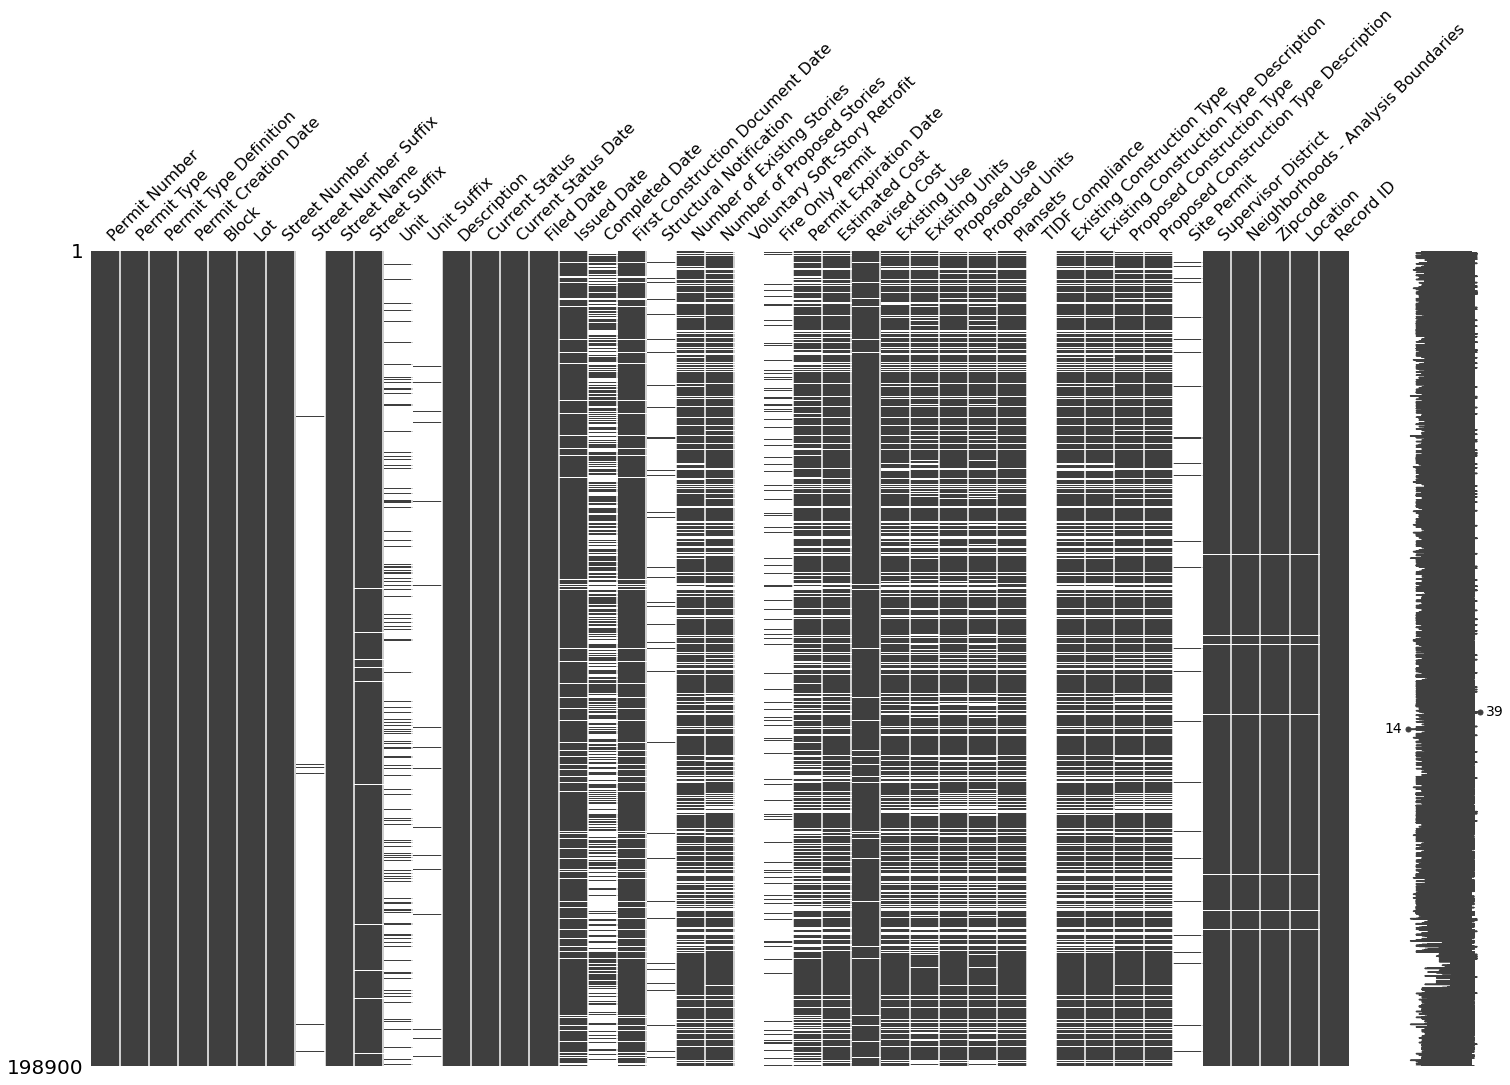

In [12]:
msno.matrix(df, figsize=(25, 15))

<AxesSubplot:>

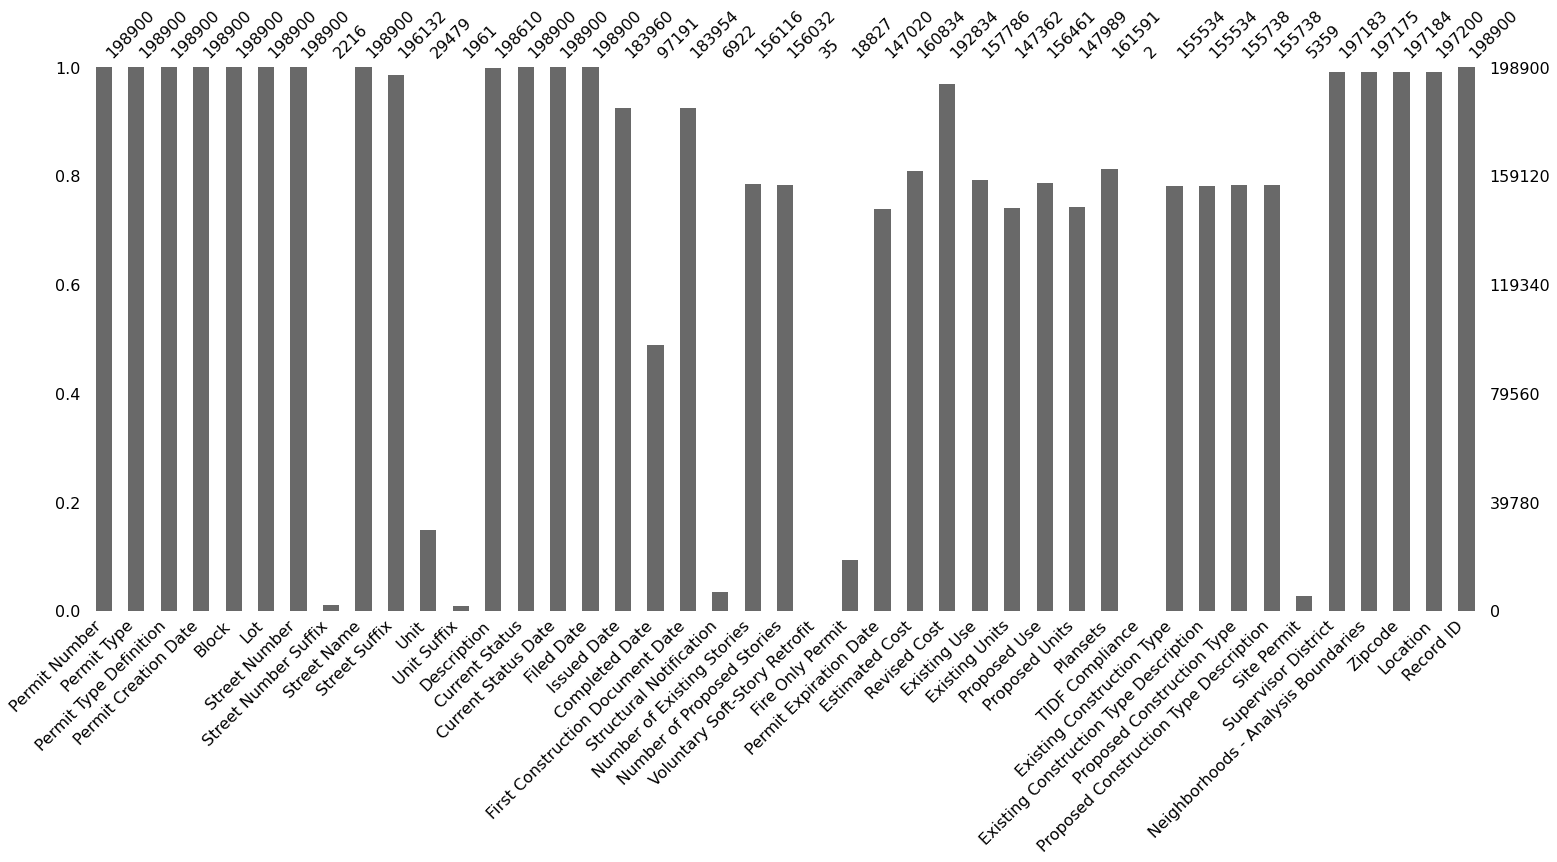

In [13]:
msno.bar(df, figsize=(25, 10))

### Написать выводы.

Сколько колонок НЕ содержат пропуски: `12`

Настолько пустые колонки, что можно было бы их удалить из-за недостатка информации: `колонки Voluntary Soft-Story Retrofit и TIDF Compliance можно удалить однозначно, колонки Street Number Suffix и Unit suffix тоже, т.к. они заполнены около 1%`

Свои мысли в свободной форме: `
в колонках Structural Notification и Fire Only Permit можно удалить строки, т.к. пропущенных значений относительного общего количества мало`

## Полный анализ случаев (Complete-Case Analysis)

Удалить слишком пустые колонки (самостоятельно решить какие именно, например, где пропущенных значений больше 50%), а затем удалить все строки с оставщимися пропущенными значениями.

Вычислить сколько строк и столбцов было удалено.

In [19]:
columns_with_na = df.columns[df.isna().any()]
columns_with_na, len(columns_with_na)

columns_without_na = df.columns[~df.isna().any()]
columns_without_na, len(columns_without_na)

percent_missing = df[columns_with_na].isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

too_missing = percent_missing[percent_missing > 50]
too_missing.index

df_without_na = df.drop(columns=too_missing.index.to_list())

df_without_na = df_without_na.dropna()

In [20]:
df_without_na

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,2.0,2.0,07/13/2018,2000.00,2000.00,1 family dwelling,1.0,1 family dwelling,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,Indiana,St,evac maps,issued,07/06/2017,06/14/2017,07/06/2017,07/06/2017,5.0,5.0,07/01/2018,4000.00,4000.00,apartments,326.0,apartments,326.0,2.0,1.0,constr type 1,1.0,constr type 1,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,11th,Av,re-roofing,complete,07/12/2017,06/30/2017,06/30/2017,06/30/2017,3.0,3.0,06/25/2018,12000.00,12000.00,apartments,5.0,apartments,5.0,0.0,5.0,wood frame (5),5.0,wood frame (5),5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
24,201708084249,8,otc alterations permit,08/08/2017,0542,039,1,Charlton,Ct,re-roofing,issued,08/08/2017,08/08/2017,08/08/2017,08/08/2017,4.0,4.0,08/08/2018,64650.00,64650.00,apartments,9.0,apartments,9.0,0.0,5.0,wood frame (5),5.0,wood frame (5),2.0,Marina,94123.0,"(37.79739093461306, -122.43127133823367)",1473796372030
25,201708165014,8,otc alterations permit,08/16/2017,1824,006,1435,29th,Av,re-roofing,issued,08/16/2017,08/16/2017,08/16/2017,08/16/2017,2.0,2.0,02/16/2018,7000.00,7000.00,1 family dwelling,1.0,1 family dwelling,1.0,0.0,5.0,wood frame (5),5.0,wood frame (5),4.0,Sunset/Parkside,94122.0,"(37.76052279949518, -122.4879889739165)",1474841115935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198873,201802232166,8,otc alterations permit,02/23/2018,5723,041,100,Tompkins,Av,to obtain final inspection for work approved u...,issued,02/23/2018,02/23/2018,02/23/2018,02/23/2018,2.0,2.0,06/23/2018,1.00,1.00,1 family dwelling,1.0,1 family dwelling,1.0,0.0,5.0,wood frame (5),5.0,wood frame (5),9.0,Bernal Heights,94110.0,"(37.73708421334594, -122.4157759256698)",1498330475722
198874,201802232106,8,otc alterations permit,02/23/2018,6592,023,336,Duncan,St,"replace tile in (e) shower as per kind, replac...",issued,02/23/2018,02/23/2018,02/23/2018,02/23/2018,3.0,3.0,08/23/2018,10000.00,15000.00,apartments,3.0,apartments,3.0,0.0,5.0,wood frame (5),5.0,wood frame (5),8.0,Noe Valley,94131.0,"(37.746231746880696, -122.4285179313817)",1498331399024
198877,201802232169,8,otc alterations permit,02/23/2018,7103,020,91,Lobos,St,to comply with nov 201708341 - replace new han...,issued,02/23/2018,02/23/2018,02/23/2018,02/23/2018,2.0,2.0,06/23/2018,1000.00,1000.00,1 family dwelling,1.0,1 family dwelling,1.0,0.0,5.0,wood frame (5),5.0,wood frame (5),11.0,Oceanview/Merced/Ingleside,94112.0,"(37.7146765393289, -122.45557353560899)",1498334221586
198879,201802232171,8,otc alterations permit,02/23/2018,6082,009,350,Paris,St,install 1300 sq ft vinyl siding to left side &...,issued,02/23/2018,02/23/2018,02/23/2018,02/23/2018,2.0,2.0,08/23/2018,18453.12,18453.12,1 family dwelling,1.0,1 family dwelling,1.0,0.0,5.0,wood frame (5),5.0,wood frame (5),11.0,Excelsior,94112.0,"(37.72324934238285, -122.43409219261636)",1498336195616


In [ ]:
#Удалено 9 столбцов и 69 433‬ строк

## `SimpleImputer`

В одной из колонок заменить пропущенные значения с помощью `sklearn.impute.SimpleImputer`. По своему усмотрению.

Результат сохранить в новую колонку с суффиксом `Imp`.

In [23]:
df['Number of Proposed Stories'].isnull().sum()

42868

In [24]:
imp = sklearn.impute.SimpleImputer(missing_values=np.nan,
                                            strategy='most_frequent')
imp

df['Number of Proposed Stories Imp'] = imp.fit_transform(df[["Number of Proposed Stories"]])
df[['Number of Proposed Stories', 'Number of Proposed Stories Imp']]

,Number of Proposed Stories,Number of Proposed Stories Imp
0,NaN,2.0
1,NaN,2.0
2,6.0,6.0
3,2.0,2.0
4,NaN,2.0
...,...,...
198895,NaN,2.0
198896,4.0,4.0
198897,NaN,2.0
198898,NaN,2.0
